In [27]:

import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
# import plotly.express as px 



df = pd.read_csv("homicide_by_countries.csv")

print(df.info(), "Helloloo World")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB
None Helloloo World


In [28]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [29]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [30]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [31]:
df.count()

Location     195
Region       195
Subregion    195
Rate         195
Count        195
Year         195
dtype: int64

In [15]:
df1 = df.sort_values('Count', ascending=False).reset_index(drop=True)
df1

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
38,Channel Islands,Europe,Northern Europe,0,0,2010
145,Saint Helena,Africa,Western Africa,0,0,2009
151,San Marino,Europe,Southern Europe,0,0,2011


In [30]:
df1 = df[["Location", "Count"]].sort_values(by="Count", ascending=False).head(5)
df1["Perc"] = (df1["Count"] *100 / df1["Count"].sum()).round(2)

df1

,Location,Count,Perc
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


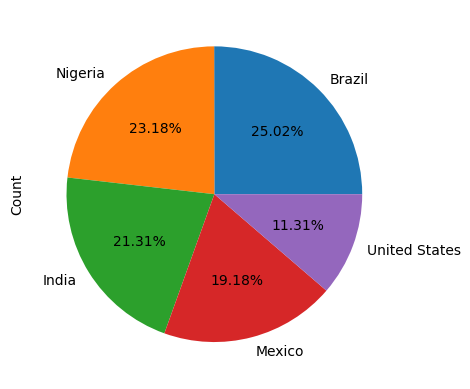

In [26]:
df1.plot(x="Location", y="Count", kind="pie", labels=df1.Location, autopct = "%1.2f%%")
plt.legend().set_visible(False)

In [39]:
df["Region"].replace("Americas", "N/S America", inplace=True)
df2 = df.groupby("Region")["Count"].sum().sort_values(ascending=False)

df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

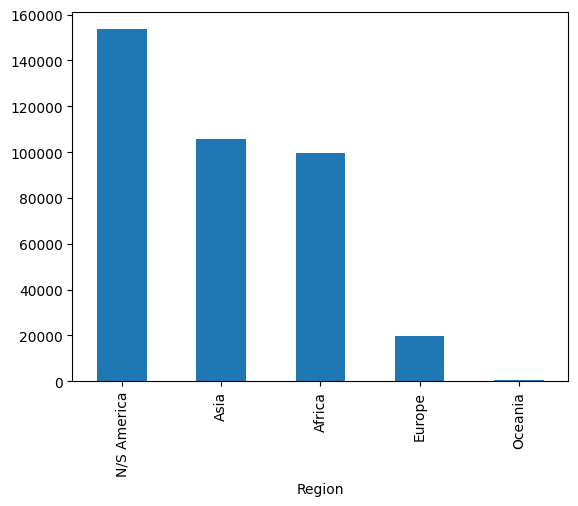

In [41]:
df2.plot(kind="bar")
plt.show()

In [45]:

df3= df.groupby("Subregion")["Count"].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

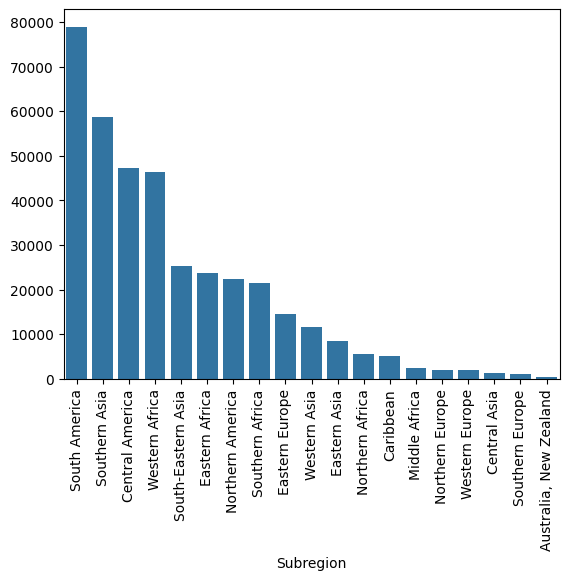

In [49]:
sns.barplot(x = df3.index, y=df3.values)
plt.xticks(rotation = 90)
xlabel = None

In [50]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [33]:

df3= df.groupby("Subregion")["Count"].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

In [46]:
df4 = df.groupby(['Region', 'Year']).sum()['Count']
df4

Region    Year
Africa    2008      1702
          2009        27
          2010       303
          2011       855
          2012     15264
          2015      2206
          2016      4987
          2017      1467
          2019     44210
          2020     28460
Americas  2006         2
          2007        26
          2009        42
          2012        53
          2014        13
          2016       608
          2018     13793
          2019      4276
          2020    134784
Asia      2006       203
          2011      1626
          2012        61
          2013      5782
          2014      3029
          2015       241
          2016       627
          2017      1787
          2018     16923
          2019      6458
          2020     53516
          2021     15299
Europe    2010         1
          2011         0
          2015         0
          2016         0
          2017      3670
          2018       883
          2019       249
          2020     15066
Oceania   

<Axes: >

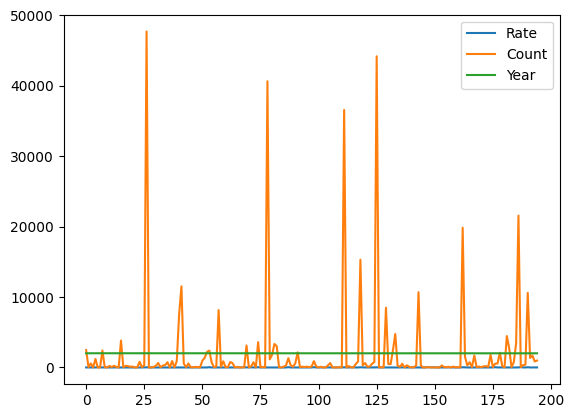

In [47]:
df.plot(kind='line')

In [50]:
df_unstacted = df4.unstack(level = 0)
df_unstacted

Region,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
2006,NaN,2.0,203.0,NaN,NaN
2007,NaN,26.0,NaN,NaN,NaN
2008,1702.0,NaN,NaN,NaN,NaN
2009,27.0,42.0,NaN,NaN,NaN
2010,303.0,NaN,NaN,1.0,NaN
2011,855.0,NaN,1626.0,0.0,NaN
2012,15264.0,53.0,61.0,NaN,NaN
2013,NaN,NaN,5782.0,NaN,NaN
2014,NaN,13.0,3029.0,NaN,NaN


In [ ]:
df_unstacted.index = df_unstacted.index.astype(int).astype(str)

<Axes: xlabel='Year'>

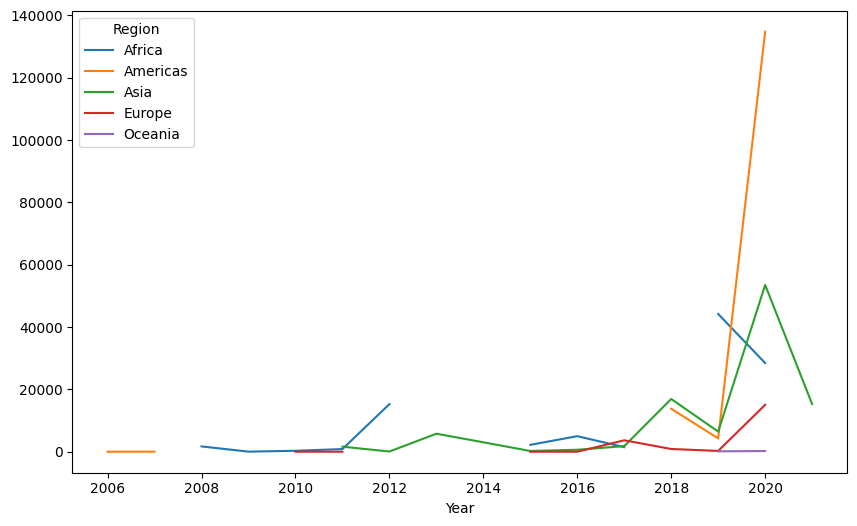

In [52]:
df_unstacted.plot(kind="line", figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over the years')